Code to generate some thesis figures

###

### Venn diagram to show the number of common pathways between metabolomic, proteomic and integrated

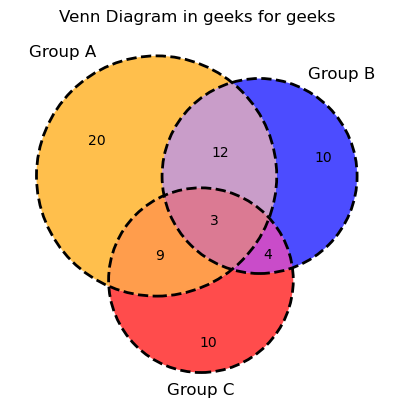

In [5]:
#https://www.geeksforgeeks.org/how-to-create-and-customize-venn-diagrams-in-python/

#import module
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
  
# depict venn diagram
venn3(subsets=(20, 10, 12, 10, 9, 4, 3), 
      set_labels=('Group A', 'Group B', 'Group C'), 
      set_colors=("orange", "blue", "red"), alpha=0.7)
  
# outline of circle line style and width
venn3_circles(subsets=(20, 10, 12, 10, 9, 4, 3),
              linestyle="dashed", linewidth=2)
  
# title of the venn diagram
plt.title("Venn Diagram in geeks for geeks")
plt.show()

Text(0.5, 1.0, 'Pathway overlap between omics')

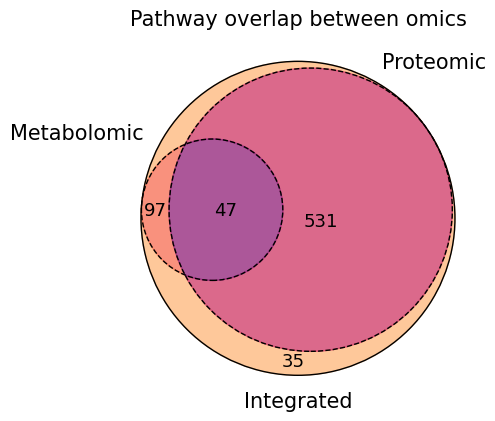

In [168]:
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

#Colours are washed out because they're overlapping, so colour by patch instead
  
#Draw Venn diagram
vd = venn3(subsets=(0, 0, 0, 35, 97, 531, 47), 
      set_labels=('Metabolomic     ', 'Proteomic', 'Integrated'), 
      set_colors=('Red', 'Yellow', 'Blue'),alpha=0.8)   #, alpha=0.1
  
#Circle outline
c = venn3_circles(subsets=(0, 0, 0, 35, 97, 531, 47), linewidth=1)
c[0].set_ls('dashed')
c[1].set_ls('dashed')


vd.get_patch_by_id("001").set_color('#febb81')   #big circle
vd.get_patch_by_id("101").set_color('#f8765c')  
vd.get_patch_by_id("011").set_color('#d3436e')   
vd.get_patch_by_id("111").set_color('#982d80')   #most overlap
 
vd.get_label_by_id("101").set_x(-0.5)   #111,(110),(100),(000),101
vd.get_label_by_id("001").set_x(-0.004)   #111,(110),(100),(000),101,001
vd.get_label_by_id("001").set_y(-0.53)   #111,(110),(100),(000),101,001,(010),011

for text in vd.set_labels:  #Omic labels
    text.set_fontsize(15)  

for x in range(len(vd.subset_labels)):
    if vd.subset_labels[x] is not None:
        vd.subset_labels[x].set_fontsize(13)


plt.title("Pathway overlap between omics",fontsize=15)    #'#5f187f', '#982d80', '#d3436e', '#f8765c', '#febb81']

Text(0.5, 1.0, 'Pathway overlap between omics')

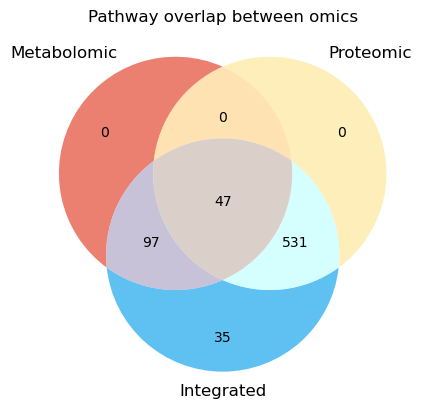

In [115]:
import matplotlib.pyplot as plt
import matplotlib_venn as mv

#Draw venn diagram
mv.venn3_unweighted(subsets=(0, 0, 0, 35, 97, 531, 47), 
      set_labels=('Metabolomic', 'Proteomic', 'Integrated'), 
      set_colors=( '#e34933', '#fee99d', '#1AA7EC'), alpha=0.7)   #        '#e34933', '#fee99d', '#588cc0'

plt.title("Pathway overlap between omics")

In [126]:
import seaborn as sns
#Obtain hex codes for sns colour palette
#https://www.practicalpythonfordatascience.com/ap_seaborn_palette
print(sns.color_palette("magma").as_hex()[:])  #'Spectral','RdYlBu'
sns.color_palette("magma")

['#221150', '#5f187f', '#982d80', '#d3436e', '#f8765c', '#febb81']


[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

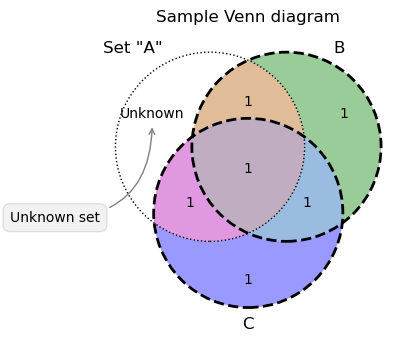

In [86]:

    from matplotlib import pyplot as plt
    import numpy as np
    from matplotlib_venn import venn3, venn3_circles
    plt.figure(figsize=(4,4))
    v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
    v.get_patch_by_id('100').set_alpha(1.0)
    v.get_patch_by_id('100').set_color('white')
    v.get_label_by_id('100').set_text('Unknown')
    v.get_label_by_id('A').set_text('Set "A"')
    c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
    c[0].set_lw(1.0)
    c[0].set_ls('dotted')
    plt.title("Sample Venn diagram")
    plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
                 ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
    plt.show()